In [3]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.pipeline import Pipeline
from sklearn.naive_bayes import GaussianNB
from sklearn.preprocessing import StandardScaler
from sklearn.neural_network import MLPClassifier
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score, classification_report,confusion_matrix, ConfusionMatrixDisplay
from sklearn.preprocessing import LabelEncoder
from sklearn.decomposition import PCA
import matplotlib.patches as mpatches
import matplotlib.pyplot as plt
from scipy import stats
import seaborn as sns
import warnings
import pandas as pd
import numpy as np

In [4]:

import pandas as pd
test = pd.read_csv('NB15_testing-set.csv')
train = pd.read_csv('NB15_training-set.csv')

print(train.columns.tolist())

train

['id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes', 'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss', 'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin', 'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth', 'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm', 'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm', 'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm', 'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label']


,id,dur,proto,service,state,spkts,dpkts,sbytes,dbytes,rate,...,ct_dst_sport_ltm,ct_dst_src_ltm,is_ftp_login,ct_ftp_cmd,ct_flw_http_mthd,ct_src_ltm,ct_srv_dst,is_sm_ips_ports,attack_cat,label
0,1,0.121478,tcp,-,FIN,6,4,258,172,74.087490,...,1,1,0,0,0,1,1,0,Normal,0
1,2,0.649902,tcp,-,FIN,14,38,734,42014,78.473372,...,1,2,0,0,0,1,6,0,Normal,0
2,3,1.623129,tcp,-,FIN,8,16,364,13186,14.170161,...,1,3,0,0,0,2,6,0,Normal,0
3,4,1.681642,tcp,ftp,FIN,12,12,628,770,13.677108,...,1,3,1,1,0,2,1,0,Normal,0
4,5,0.449454,tcp,-,FIN,10,6,534,268,33.373826,...,1,40,0,0,0,2,39,0,Normal,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
175336,175337,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,13,24,0,0,0,24,24,0,Generic,1
175337,175338,0.505762,tcp,-,FIN,10,8,620,354,33.612649,...,1,2,0,0,0,1,1,0,Shellcode,1
175338,175339,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,3,13,0,0,0,3,12,0,Generic,1
175339,175340,0.000009,udp,dns,INT,2,0,114,0,111111.107200,...,14,30,0,0,0,30,30,0,Generic,1


C:\Users\zalak\AppData\Local\Temp\ipykernel_32876\4242382312.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_encoded[column] = le.fit_transform(train_encoded[column].astype(str))
C:\Users\zalak\AppData\Local\Temp\ipykernel_32876\4242382312.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train_encoded[column] = le.fit_transform(train_encoded[column].astype(str))
C:\Users\zalak\AppData\Local\Temp\ipykernel_32876\4242382312.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy o

train               0         1         2         3         4         5         6   \
0      -0.409218  0.848024 -0.049134 -0.458048 -0.389897 -0.135769 -0.273700   
1      -0.409218  0.848024 -0.046410 -0.414076 -0.389928  0.172599 -0.069233   
2      -0.409218  0.848024 -0.048527 -0.443391 -0.389964 -0.026933 -0.252044   
3      -0.409218  0.848024 -0.047016 -0.414076 -0.389958 -0.063212 -0.275821   
4      -0.409218  0.848024 -0.047554 -0.409190 -0.389927 -0.117630 -0.275561   
...          ...       ...       ...       ...       ...       ...       ...   
175336  0.742936  0.210364 -0.049958 -0.389647 -0.120980 -0.172047 -0.277208   
175337 -0.409218  2.123345 -0.047062 -0.365219 -0.389926 -0.099490 -0.275183   
175338  0.742936  0.210364 -0.049958 -0.389647 -0.120980 -0.172047 -0.277208   
175339  0.742936  0.210364 -0.049958 -0.389647 -0.120980 -0.172047 -0.277208   
175340  0.742936  0.210364 -0.049958 -0.389647 -0.120980 -0.172047 -0.277208   

              7         8        

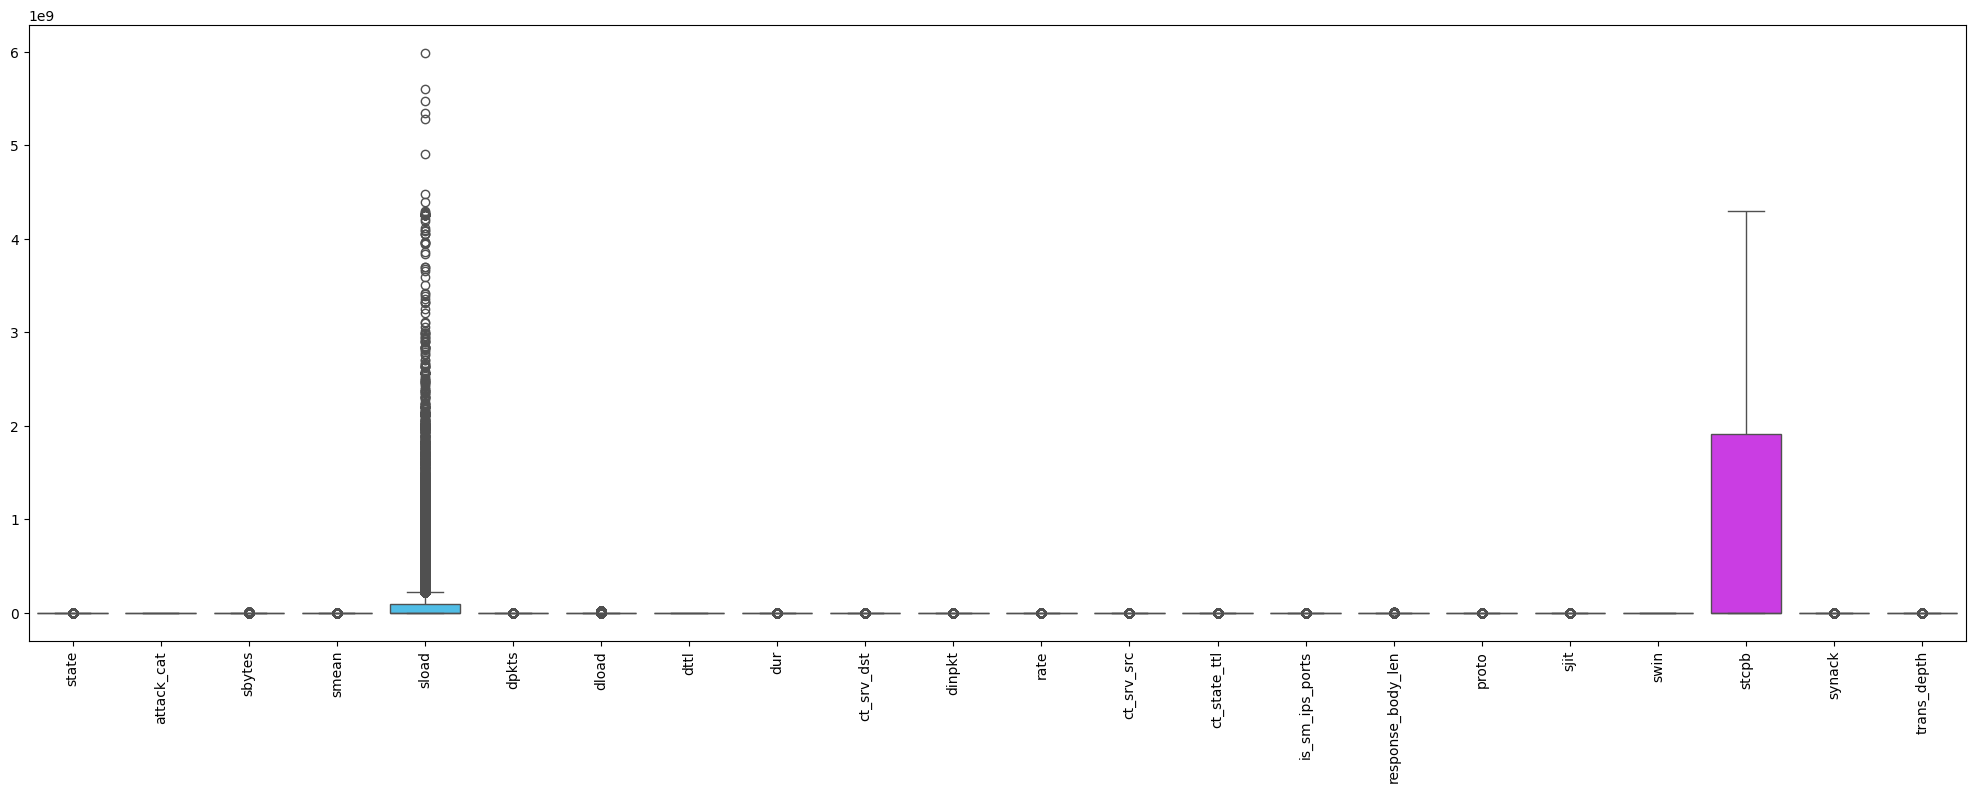

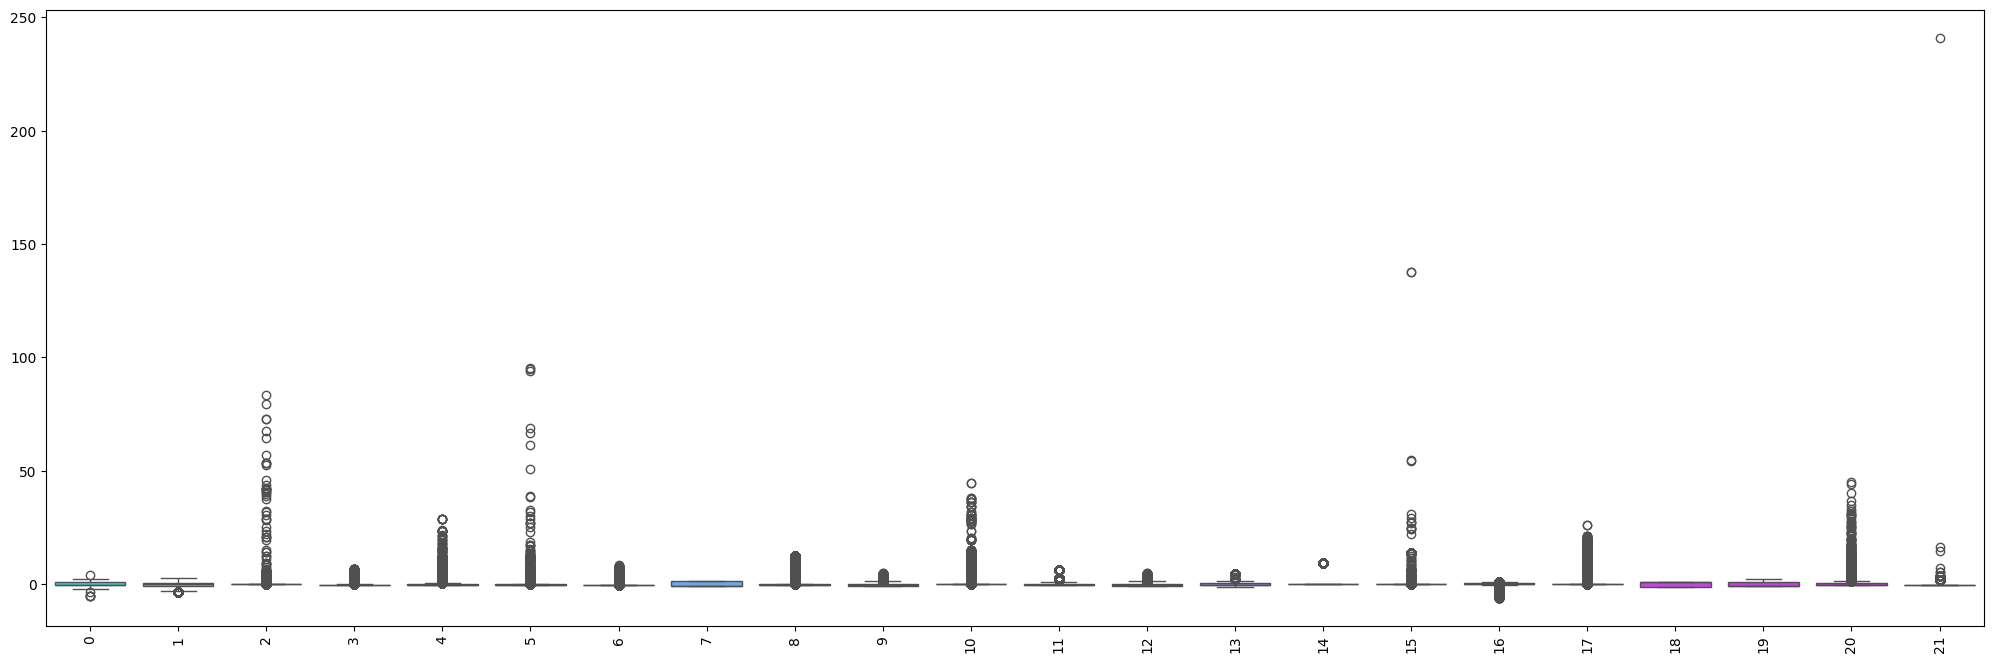

In [5]:
features = ['state', 'attack_cat', 'sbytes', 'smean','sload', 'dpkts', 'dload', 'dttl', 'dur',
            'ct_srv_dst', 'dinpkt', 'rate', 'ct_srv_src', 'ct_state_ttl', 'is_sm_ips_ports',
            'response_body_len', 'proto', 'sjit', 'swin', 'stcpb', 'synack', 'trans_depth']


#train_encoded = pd.DataFrame(train.drop(features, axis = 1).values)
train_encoded = train[features]

label_encoders = {}
for column in train_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    train_encoded[column] = le.fit_transform(train_encoded[column].astype(str))
    label_encoders[column] = le

plt.figure(figsize = (25,8))
u = sns.boxplot(palette = 'cool', data=train_encoded)
u.set_xticklabels(u.get_xticklabels(),rotation=90)

train_scaler = StandardScaler()
clean_train = pd.DataFrame(train_scaler.fit_transform(train_encoded))

#test_encoded = pd.DataFrame(test.drop(features, axis = 1).values)

test_encoded = test[features]
# test_encoded = test_feat.replace({True: 0, False: 1})

for column in test_encoded.select_dtypes(include=['object']).columns:
    le = LabelEncoder()
    test_encoded[column] = le.fit_transform(test_encoded[column].astype(str))
    label_encoders[column] = le

test_scaler = StandardScaler()
clean_test = pd.DataFrame(test_scaler.fit_transform(test_encoded))

plt.figure(figsize = (25,8))
u = sns.boxplot(palette = 'cool', data=clean_test)
u.set_xticklabels(u.get_xticklabels(),rotation=90)
print("train",clean_train)
print("test",clean_test)


Remove outliers and make the scale robust:

              0         1         2         3         4         5         6   \
0      -0.409218  0.848024 -0.049134 -0.458048 -0.389897 -0.135769 -0.273700   
1      -0.409218  0.848024 -0.046410 -0.414076 -0.389928  0.172599 -0.069233   
2      -0.409218  0.848024 -0.048527 -0.443391 -0.389964 -0.026933 -0.252044   
3      -0.409218  0.848024 -0.047016 -0.414076 -0.389958 -0.063212 -0.275821   
4      -0.409218  0.848024 -0.047554 -0.409190 -0.389927 -0.117630 -0.275561   
...          ...       ...       ...       ...       ...       ...       ...   
175336  0.742936  0.210364 -0.049958 -0.389647 -0.120980 -0.172047 -0.277208   
175337 -0.409218  2.123345 -0.047062 -0.365219 -0.389926 -0.099490 -0.275183   
175338  0.742936  0.210364 -0.049958 -0.389647 -0.120980 -0.172047 -0.277208   
175339  0.742936  0.210364 -0.049958 -0.389647 -0.120980 -0.172047 -0.277208   
175340  0.742936  0.210364 -0.049958 -0.389647 -0.120980 -0.172047 -0.277208   

              7         8         9   .

C:\Users\zalak\AppData\Local\Temp\ipykernel_32876\280635512.py:37: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  u.set_xticklabels(u.get_xticklabels(),rotation=90)


[Text(0, 0, '0'),
 Text(1, 0, '1'),
 Text(2, 0, '2'),
 Text(3, 0, '3'),
 Text(4, 0, '4'),
 Text(5, 0, '5'),
 Text(6, 0, '6'),
 Text(7, 0, '7'),
 Text(8, 0, '8'),
 Text(9, 0, '9'),
 Text(10, 0, '10'),
 Text(11, 0, '11'),
 Text(12, 0, '12'),
 Text(13, 0, '13'),
 Text(14, 0, '14'),
 Text(15, 0, '15'),
 Text(16, 0, '16'),
 Text(17, 0, '17'),
 Text(18, 0, '18'),
 Text(19, 0, '19'),
 Text(20, 0, '20'),
 Text(21, 0, '21')]

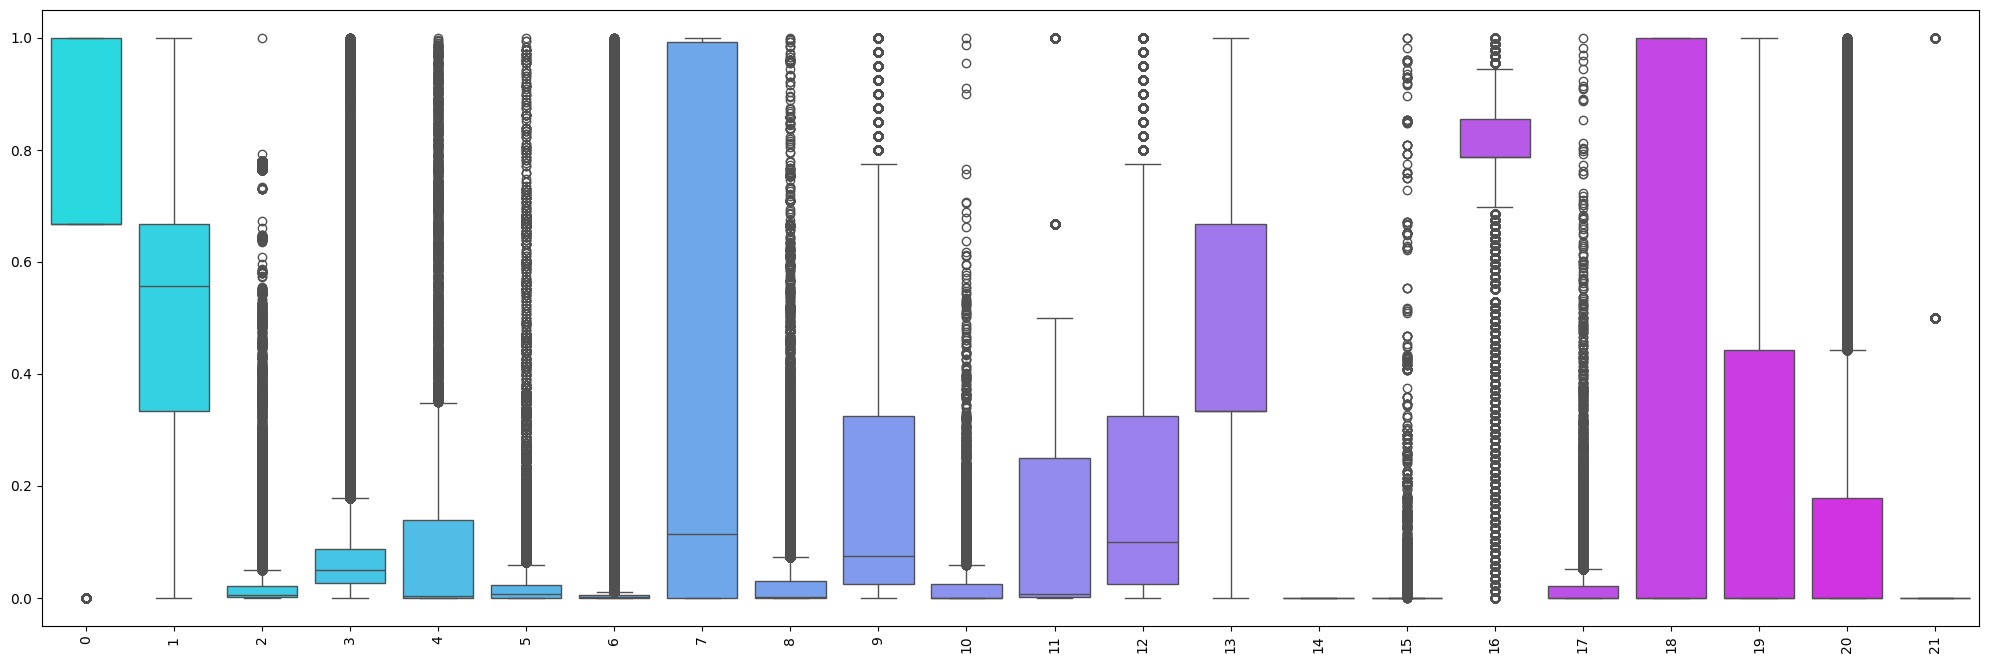

In [6]:

from sklearn.preprocessing import RobustScaler, MinMaxScaler

# Calculate Z-scores
z_scores = np.abs(stats.zscore(train_encoded))

X_train_df = clean_train
X_test_df =  clean_test

y_train = train[['label']]
y_test = test[['label']]

# Getting rid of outliers
print(X_train_df)

# Step 2: Apply Z-score filter on X_train
z_scores_train = np.abs(stats.zscore(X_train_df))
train_mask = (z_scores_train < 3).all(axis=1)
X_train_filtered = X_train_df[train_mask]
y_train_filtered = y_train[train_mask]  # no .iloc or .values

# Step 3: Apply Z-score filter on X_test
z_scores_test = np.abs(stats.zscore(X_test_df))
test_mask = (z_scores_test < 3).all(axis=1)
X_test_filtered = X_test_df[test_mask]
y_test_filtered =  y_test[test_mask]  # no .iloc or .values
ro_scaler = RobustScaler()
scaler = MinMaxScaler()

X_train_filtered = ro_scaler.fit_transform(X_train_filtered)
X_test_filtered = ro_scaler.fit_transform(X_test_filtered)

X_train_filtered = pd.DataFrame(scaler.fit_transform(X_train_filtered))
X_test_filtered = pd.DataFrame(scaler.fit_transform(X_test_filtered))

plt.figure(figsize = (25,8))
u = sns.boxplot(palette = 'cool', data=X_train_filtered)
u.set_xticklabels(u.get_xticklabels(),rotation=90)



In [233]:
X_train_filtered.shape
y_train_filtered.shape
X_test_filtered.shape
y_test_filtered.shape


(66648, 1)

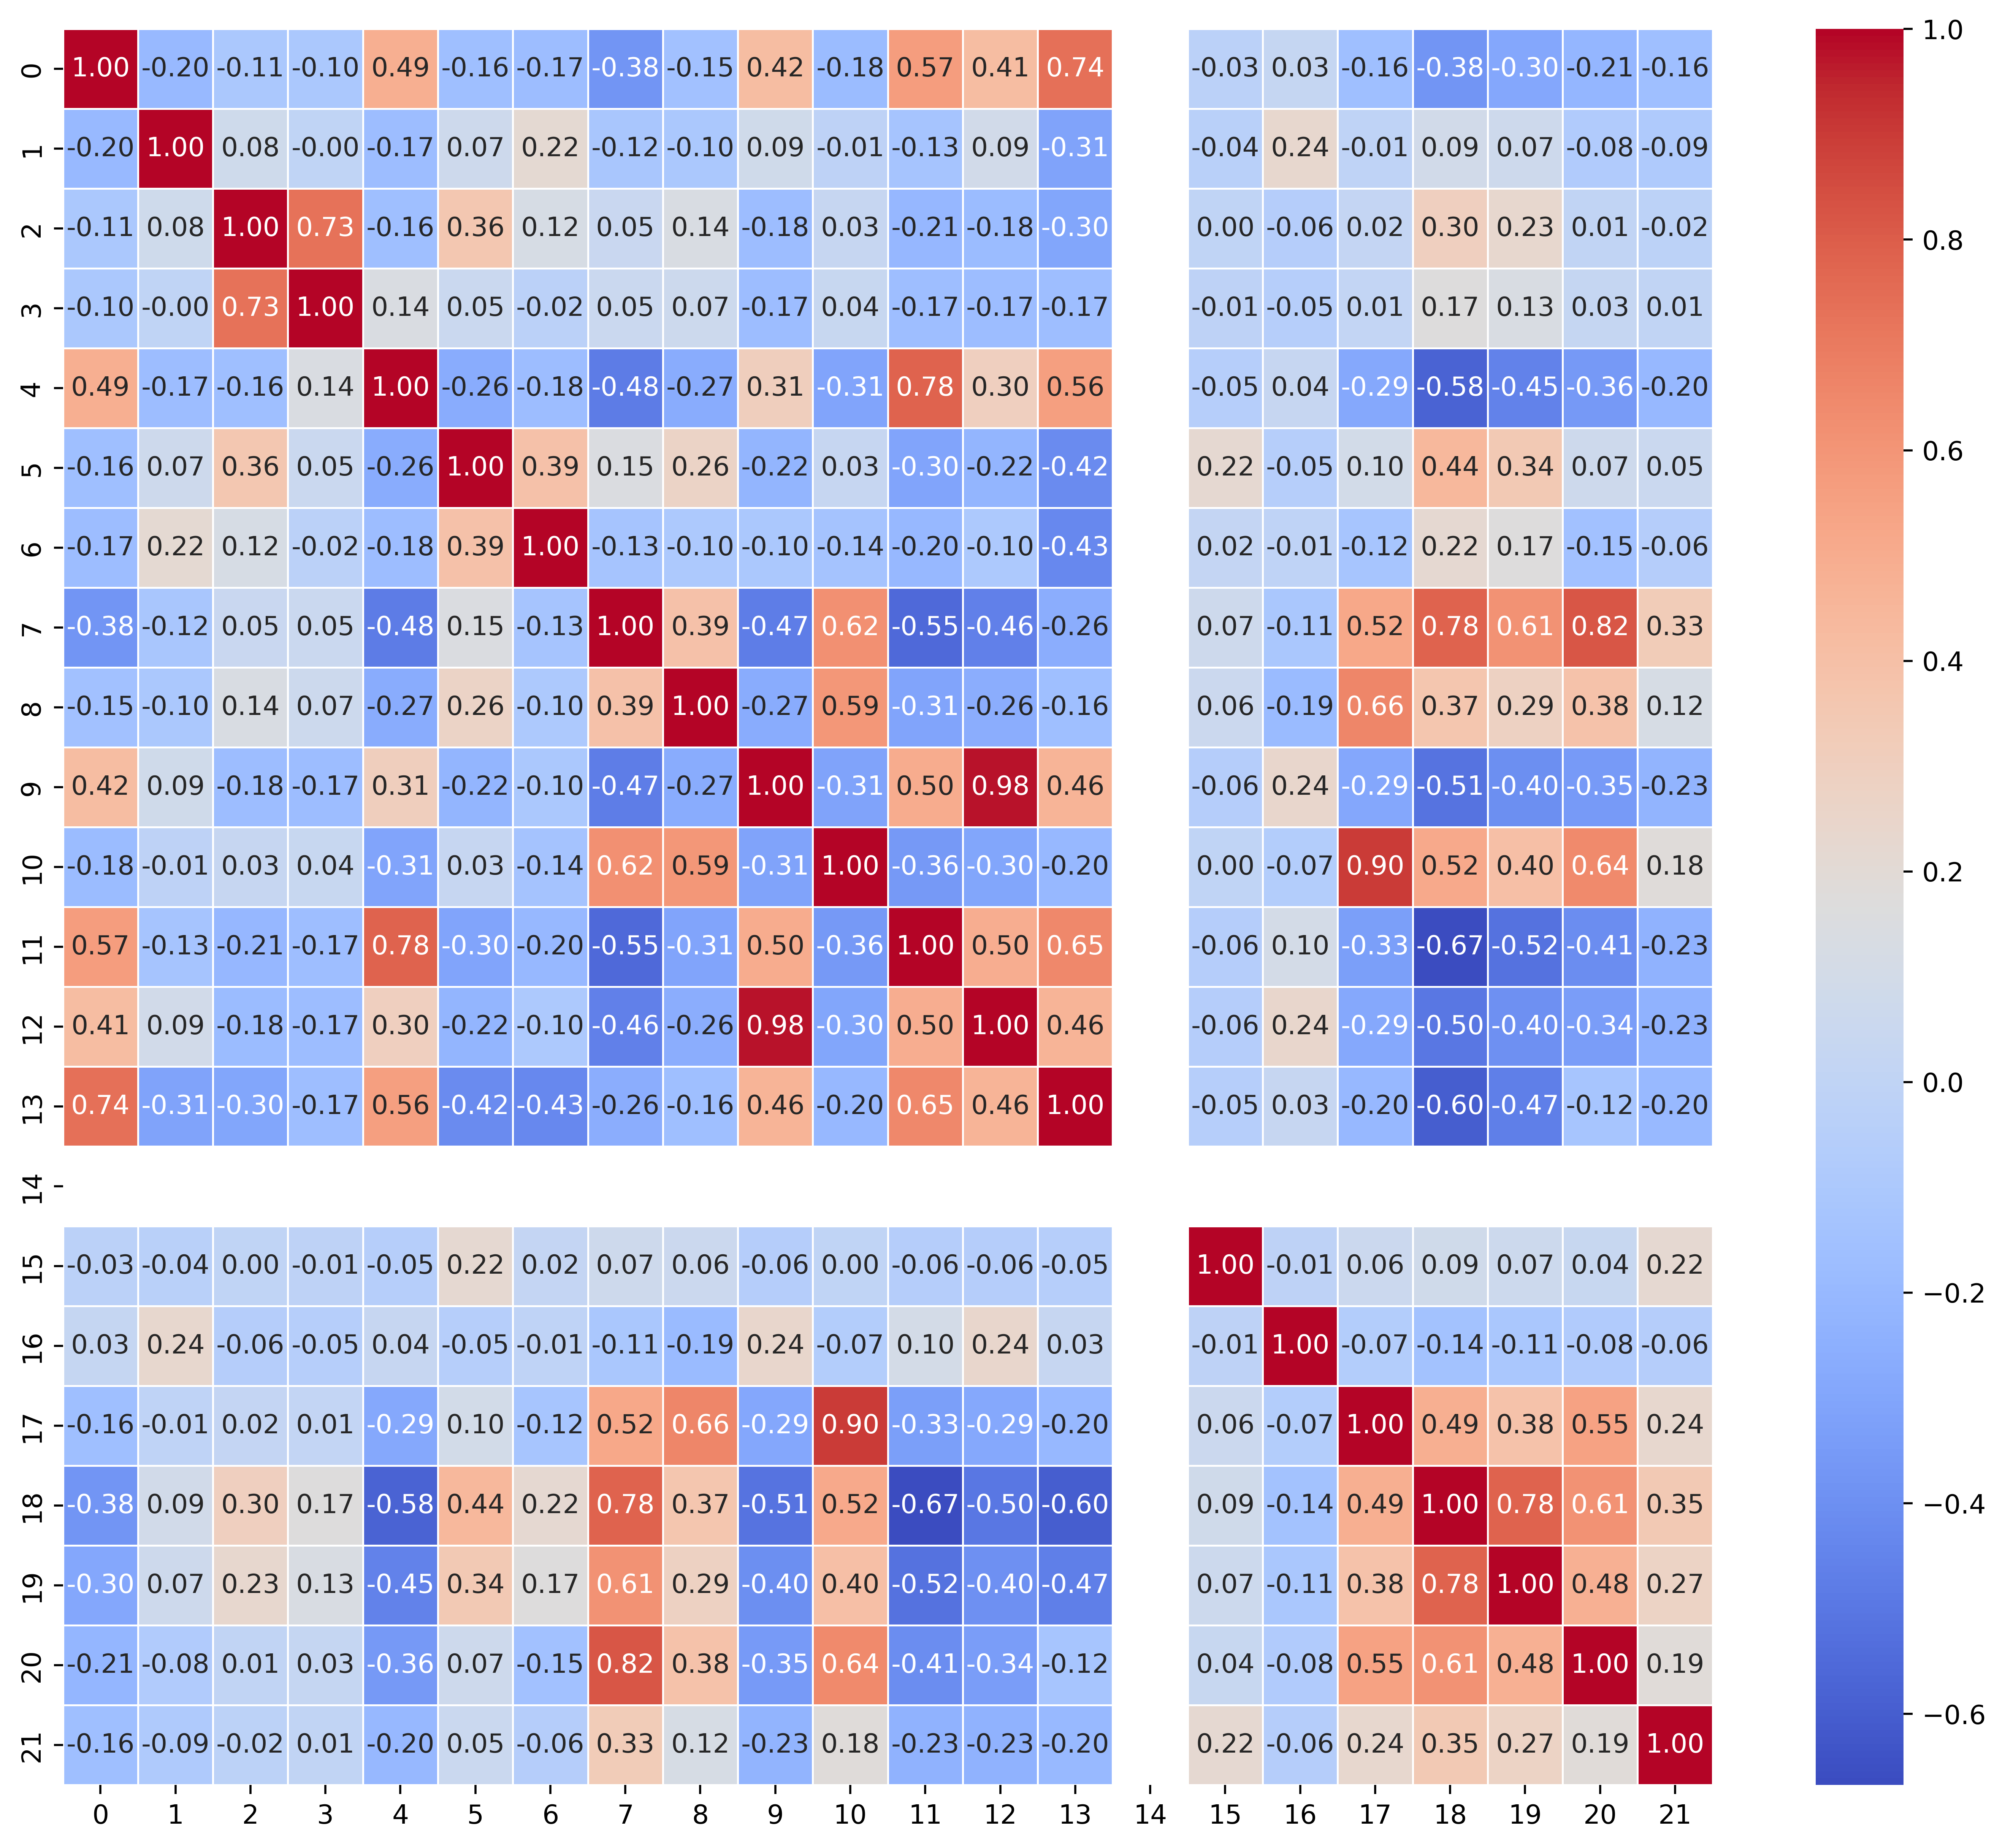

In [82]:
#correlation matrix
df = pd.concat([X_train_filtered, X_test_filtered], ignore_index=True)
correlation_matrix = df.corr()
plt.figure(figsize=(14,12), dpi =500)
sns.heatmap(correlation_matrix,annot=True,fmt=".2f", linewidth=.5, cmap = 'coolwarm')
plt.show()

C:\Users\zalak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Classification Report for Logistic Regression:
               precision    recall  f1-score   support

           0     0.8750    0.8558    0.8653     28474
           1     0.8918    0.9067    0.8992     37309

    accuracy                         0.8847     65783
   macro avg     0.8834    0.8813    0.8822     65783
weighted avg     0.8845    0.8847    0.8845     65783



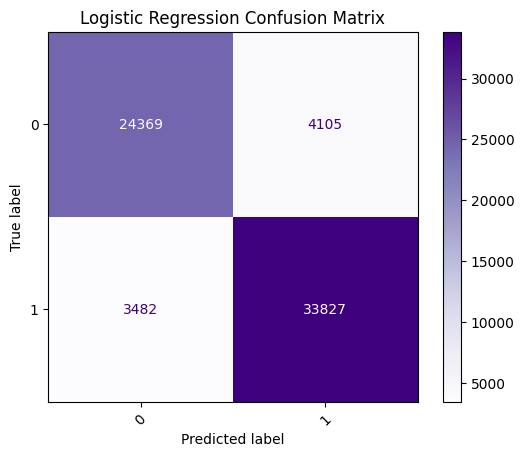

In [7]:
#logistic regression
logreg = LogisticRegression(max_iter=200000)
logreg.fit(X_train_filtered, y_train_filtered)

y_pred_lg = logreg.predict(X_test_filtered)
print("\nClassification Report for Logistic Regression:\n", classification_report(y_test_filtered, y_pred_lg, digits=4, zero_division=0))

cm_lg = confusion_matrix(y_test_filtered, y_pred_lg)
disp = ConfusionMatrixDisplay(confusion_matrix=cm_lg)
disp.plot(cmap='Purples', xticks_rotation=45)
plt.title("Logistic Regression Confusion Matrix")
plt.show()

C:\Users\zalak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\utils\validation.py:1408: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Classification Report for Gaussian Naive Bayes:
               precision    recall  f1-score   support

           0     0.0000    0.0000    0.0000     28953
           1     0.5575    1.0000    0.7159     36482

    accuracy                         0.5575     65435
   macro avg     0.2788    0.5000    0.3580     65435
weighted avg     0.3108    0.5575    0.3991     65435



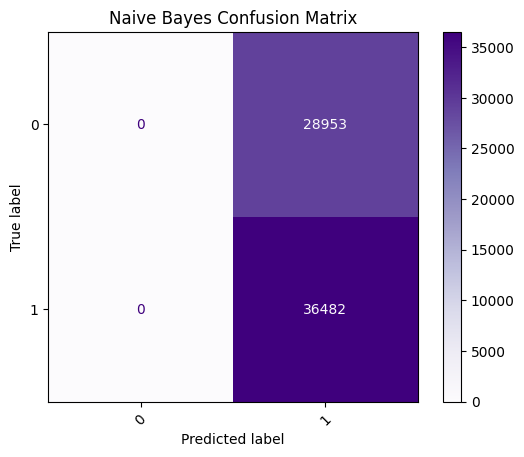

In [65]:
#naive bayes
nb_model = GaussianNB()
nb_model.fit(X_train_filtered, y_train_filtered)
y_pred_nb = nb_model.predict(X_test_filtered)
cm_nb = confusion_matrix(y_test_filtered, y_pred_nb)

print("\nClassification Report for Gaussian Naive Bayes:\n", classification_report(y_test_filtered, y_pred_nb, digits=4, zero_division=0))
disp = ConfusionMatrixDisplay(confusion_matrix=cm_nb)
disp.plot(cmap='Purples', xticks_rotation=45)
plt.title("Naive Bayes Confusion Matrix")
plt.show()

In [57]:
# mlp
#def mlp_classifier(X_train, X_test, y_train, y_test):
pipeline = Pipeline([('scaler', StandardScaler()),('mlp', MLPClassifier(hidden_layer_sizes=(100,), max_iter=200,random_state=42))])

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization

model = Sequential([
    Dense(128, activation='relu', input_shape=(X_train_filtered.shape[1],)),
    BatchNormalization(),
    Dropout(0.4),
    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),
    Dense(1, activation='sigmoid')  # or softmax for multi-class
])

pipeline.fit(X_train_filtered, y_train_filtered)
y_pred_mlp = pipeline.predict(X_test_filtered)  
acc = accuracy_score(y_test_filtered, y_pred_mlp)
f1 = f1_score(y_test_filtered, y_pred_mlp, average='weighted')
print("\nClassification Report using MLP: \n", classification_report(y_test_filtered, y_pred_mlp, digits=4, zero_division=0))




C:\Users\zalak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)
C:\Users\zalak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:1124: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)



Classification Report using MLP: 
               precision    recall  f1-score   support

           0     0.9154    0.8179    0.8639     29518
           1     0.8689    0.9411    0.9036     37858

    accuracy                         0.8871     67376
   macro avg     0.8922    0.8795    0.8837     67376
weighted avg     0.8893    0.8871    0.8862     67376



C:\Users\zalak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neural_network\_multilayer_perceptron.py:698: UserWarning: Training interrupted by user.
  warnings.warn("Training interrupted by user.")


In [44]:
import xgboost as xgb
from sklearn.metrics import recall_score, precision_score, f1_score, classification_report

# Define the model
xgb_clf = xgb.XGBClassifier(eval_metric='logloss')

# Fit the model
xgb_clf.fit(X_train_filtered, y_train_filtered)

# Make predictions
y_pred_xgb = xgb_clf.predict(X_test_filtered)


print("\nClassification Report using MLP: \n", classification_report(y_test_filtered, y_pred_xgb, digits=4, zero_division=0))

ModuleNotFoundError: No module named 'xgboost'

In [45]:
#random forest
forest = RandomForestClassifier()
forest.fit(X_train_filtered, y_train_filtered)
y_pred_f = forest.predict(X_test_filtered)
cm_f = confusion_matrix(y_test_filtered, y_pred_f)

#mlp_results = evaluate_model(pipeline, X_test, Y_test)
    
print("\nClassification Report for Random Forest:\n", classification_report(y_test_filtered, y_pred_f, digits=4, zero_division=0))

disp = ConfusionMatrixDisplay(confusion_matrix=cm_f)
disp.plot(cmap='Purples', xticks_rotation=45)
plt.title("Random Forest Confusion Matrix")
plt.show()

def graph_importance(forest, X_train):
    # Feature Importance graph
    importances = pd.Series(forest.feature_importances_, index=X_train.columns)
    importances.sort_values(ascending=False).plot(kind='barh', figsize=(8, 5))
    plt.title("Feature Importance (Random Forest)")
    plt.xlabel("Absolute Weight (Importance)")
    plt.ylabel("Features")
    plt.xlim(0, 0.7)
    plt.tight_layout()
    plt.show()
    
graph_importance(forest, X_train_filtered)

C:\Users\zalak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\base.py:1389: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


KeyboardInterrupt: 

C:\Users\zalak\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.12_qbz5n2kfra8p0\LocalCache\local-packages\Python312\site-packages\sklearn\neighbors\_classification.py:239: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return self._fit(X, y)



Classification Report for Random Forest:
               precision    recall  f1-score   support

           0     0.9988    0.9316    0.9640     28474
           1     0.9503    0.9991    0.9741     37309

    accuracy                         0.9699     65783
   macro avg     0.9745    0.9654    0.9691     65783
weighted avg     0.9713    0.9699    0.9697     65783



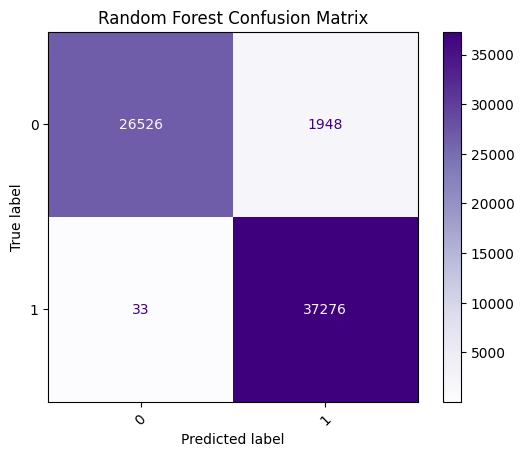

In [84]:
#random forest
forest = KNeighborsClassifier(n_neighbors = 7)
forest.fit(X_train_filtered, y_train_filtered)
y_pred_f = forest.predict(X_test_filtered)
cm_f = confusion_matrix(y_test_filtered, y_pred_f)

#mlp_results = evaluate_model(pipeline, X_test, Y_test)
    
print("\nClassification Report for Random Forest:\n", classification_report(y_test_filtered, y_pred_f, digits=4, zero_division=0))

disp = ConfusionMatrixDisplay(confusion_matrix=cm_f)
disp.plot(cmap='Purples', xticks_rotation=45)
plt.title("Random Forest Confusion Matrix")
plt.show()

In [8]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout, BatchNormalization, Input
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.model_selection import train_test_split

# Split your final data again if needed
X_train, X_val, y_train, y_val = train_test_split(
    X_train_filtered, y_train_filtered, test_size=0.2, random_state=42
)

# Define the model
model = Sequential([
    Input(shape=(X_train.shape[1],)),                    # Input layer
    Dense(128, activation='relu'),
    BatchNormalization(),
    Dropout(0.4),

    Dense(64, activation='relu'),
    BatchNormalization(),
    Dropout(0.3),

    Dense(32, activation='relu'),
    Dropout(0.2),

    Dense(1, activation='sigmoid')  # Use softmax with units=num_classes for multi-class
])

# Compile the model
model.compile(
    optimizer=Adam(learning_rate=0.001),
    loss='binary_crossentropy',    # use 'categorical_crossentropy' for multi-class
    metrics=['accuracy']
)

# Early stopping
early_stop = EarlyStopping(
    monitor='val_loss',
    patience=5,
    restore_best_weights=True
)

# Train the model
history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val),
    epochs=20,
    batch_size=64,
    callbacks=[early_stop],
    verbose=1
)

# Evaluate on test set
test_loss, test_acc = model.evaluate(X_test_filtered, y_test_filtered, verbose=1)
print(f"Test Accuracy: {test_acc:.4f}")

Epoch 1/10
1792/1792 ━━━━━━━━━━━━━━━━━━━━ 10s 4ms/step - accuracy: 0.9298 - loss: 0.1637 - val_accuracy: 0.9999 - val_loss: 0.0024
Epoch 2/10
1792/1792 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9938 - loss: 0.0186 - val_accuracy: 1.0000 - val_loss: 5.6183e-04
Epoch 3/10
1792/1792 ━━━━━━━━━━━━━━━━━━━━ 8s 5ms/step - accuracy: 0.9974 - loss: 0.0085 - val_accuracy: 1.0000 - val_loss: 2.9076e-04
Epoch 4/10
1792/1792 ━━━━━━━━━━━━━━━━━━━━ 19s 10ms/step - accuracy: 0.9978 - loss: 0.0070 - val_accuracy: 1.0000 - val_loss: 5.1626e-05
Epoch 5/10
1792/1792 ━━━━━━━━━━━━━━━━━━━━ 21s 11ms/step - accuracy: 0.9982 - loss: 0.0058 - val_accuracy: 1.0000 - val_loss: 3.4360e-05
Epoch 6/10
1792/1792 ━━━━━━━━━━━━━━━━━━━━ 12s 7ms/step - accuracy: 0.9987 - loss: 0.0055 - val_accuracy: 1.0000 - val_loss: 5.9096e-05
Epoch 7/10
1792/1792 ━━━━━━━━━━━━━━━━━━━━ 7s 4ms/step - accuracy: 0.9989 - loss: 0.0042 - val_accuracy: 1.0000 - val_loss: 5.8096e-05
Epoch 8/10
1792/1792 ━━━━━━━━━━━━━━━━━━━━ 11s 6ms/step - acc